# Libraries

In [1]:
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.simplefilter('ignore')

# Dataset

In [2]:
df = pd.read_csv('iris.csv')
df.head(20)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


# Data Summary

In [3]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

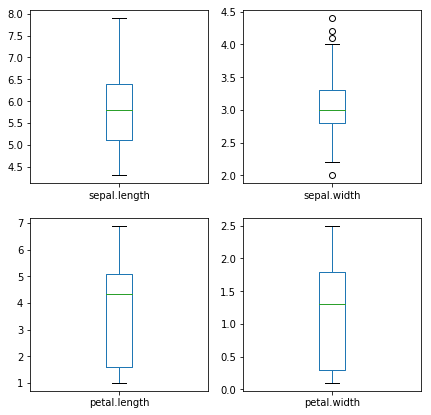

In [4]:
# Box plots

df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(7,7))
plt.show()

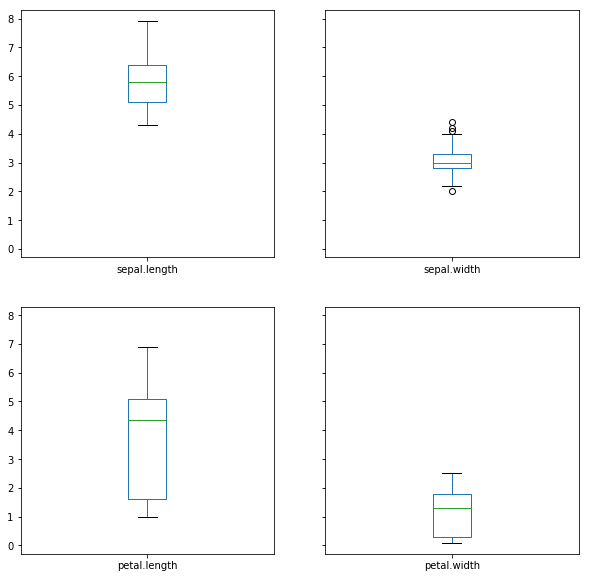

In [5]:
# Same as the above, but with `sharex` and `sharey` set to True. 
# Helps me understand the relative size of the attributes 

df.plot(kind='box', subplots=True, layout=(2,2), sharex=True, sharey=True, figsize=(10,10))
plt.show()

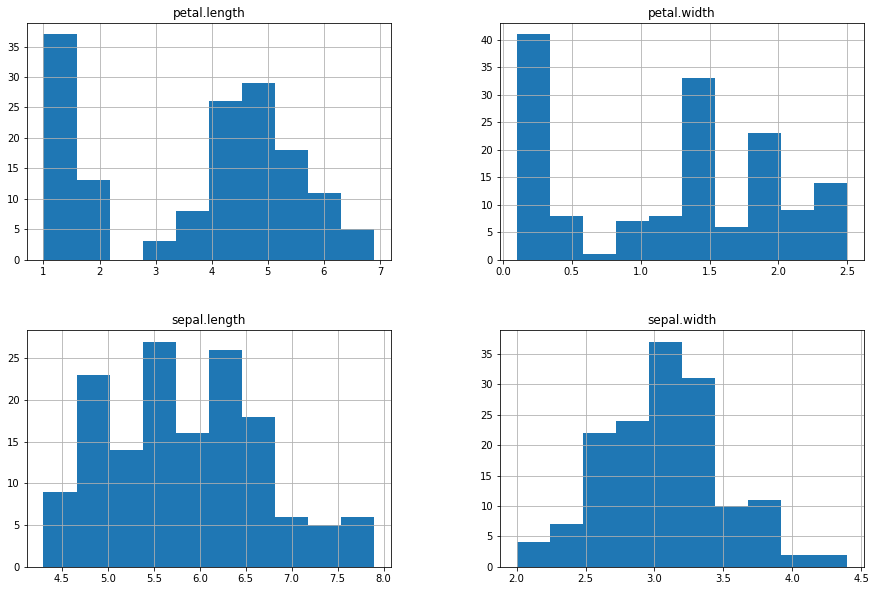

In [6]:
# Histograms

df.hist(figsize=(15,10))
plt.show()

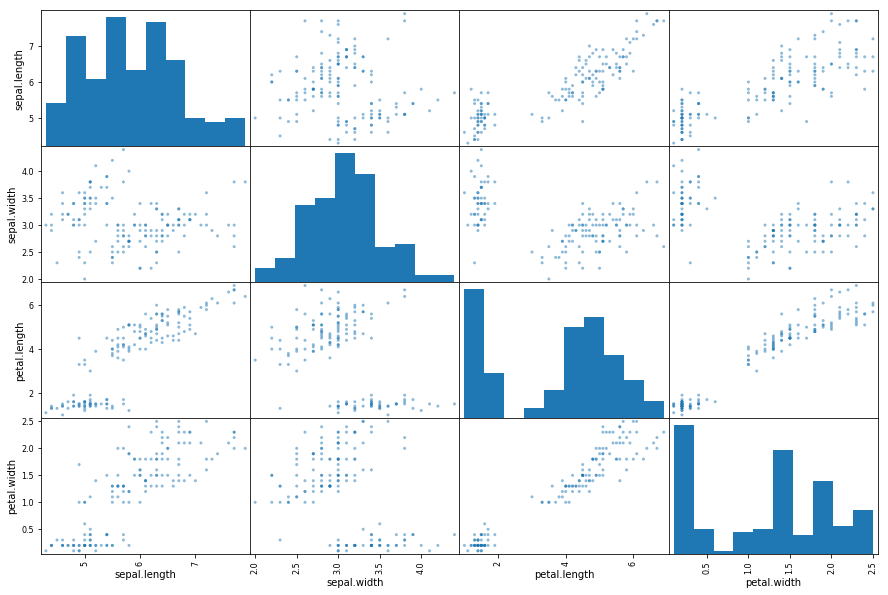

In [7]:
# Scatter plot matrix

scatter_matrix(df, figsize=(15,10))
plt.show()

# Data Validation

In [8]:
array = df.values
X = array[:, 0:4]
Y = array[:, 4]
validation_size = .20
seed = 7
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = validation_size, random_state = seed)

# Build Models

In [9]:
# Algorithms to train
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate Models
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
KNN: 0.983333 (0.033333)
DTC: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


# Model Selection

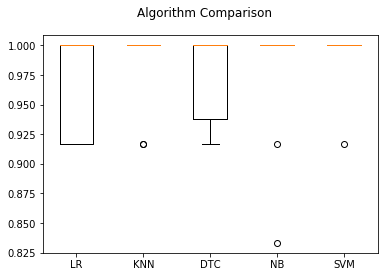

In [10]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Make Predictions

We will use the KNN, Decision Tree and the SVC models to make predictions 
on the validation dataset for a final accuracy evaluation.

# KNN

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_val)


In [12]:
# Accuracy Score
accuracy_score(Y_val, predictions)

0.9

In [13]:
# Confusion Matrix
confusion_matrix(Y_val, predictions)

array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  2,  9]], dtype=int64)

In [14]:
# Classification Report
print(classification_report(Y_val, predictions))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         7
  Versicolor       0.85      0.92      0.88        12
   Virginica       0.90      0.82      0.86        11

   micro avg       0.90      0.90      0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



# Decision Tree Classifier(DTC)

In [15]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_val)

In [16]:
# Accuracy Score
accuracy_score(Y_val, predictions)

0.9

In [17]:
# Confusion Matrix
confusion_matrix(Y_val, predictions)

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  1, 10]], dtype=int64)

In [18]:
# Classification Report
print(classification_report(Y_val, predictions))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         7
  Versicolor       0.91      0.83      0.87        12
   Virginica       0.83      0.91      0.87        11

   micro avg       0.90      0.90      0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



# SVM

In [19]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_val)

In [20]:
# Accuracy Score
accuracy_score(Y_val, predictions)

0.9333333333333333

In [21]:
# Confusion Matrix
confusion_matrix(Y_val, predictions)

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  0, 11]], dtype=int64)

In [22]:
# Classification Report
print(classification_report(Y_val, predictions))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         7
  Versicolor       1.00      0.83      0.91        12
   Virginica       0.85      1.00      0.92        11

   micro avg       0.93      0.93      0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



# Conclusion:

Support Vector Machines (SVM) with an accuracy of 93% comes out as a better contender 
for this analysis. Though, in the tutorial where I picked this analysis from, KNN proved to be better. 
Not sure, how that is. I am just starting out :)